In [ ]:
from xmlrpc.client import boolean
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
transaction_data=pd.read_csv('card_transdata.csv')
print(transaction_data.head())
print(transaction_data.shape)
print(transaction_data.info)
print(transaction_data.dtypes)

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
(1000000, 8)
<

In [ ]:
print(transaction_data.fraud.value_counts())

0.0    912597
1.0     87403
Name: fraud, dtype: int64


el dataset es altamente imbalanceado

dar formato adecuado a las columnas del dataset

In [ ]:
transaction_data.fraud=transaction_data['fraud'].astype(boolean)
transaction_data.repeat_retailer=transaction_data['repeat_retailer'].astype(boolean)
transaction_data.used_chip=transaction_data['used_chip'].astype(boolean)
transaction_data.used_pin_number=transaction_data['used_pin_number'].astype(boolean)
transaction_data.online_order=transaction_data['online_order'].astype(boolean)

separar las variables independientes de las dependientes

In [ ]:
X=transaction_data.drop(['fraud'],axis=1)
y=transaction_data['fraud']

separar los datos de entrenamiento de los de prueba, dejando para estos el 10% del total

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=27, shuffle=False, stratify=None)

debido a que el dataset es imbalanceado se procede a repoblar los datos de entrenamiento con datos sintéticos

In [ ]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

entrenamiento de un modelo SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = SGDClassifier(max_iter=1000, tol=1e-3)

In [ ]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

              precision    recall  f1-score   support

       False       0.99      0.94      0.97     91398
        True       0.61      0.94      0.74      8602

    accuracy                           0.94    100000
   macro avg       0.80      0.94      0.86    100000
weighted avg       0.96      0.94      0.95    100000

Accuracy  0.94383
Precision  0.6128885863399137
[[86280  5118]
 [  499  8103]]
0.9429966929413716


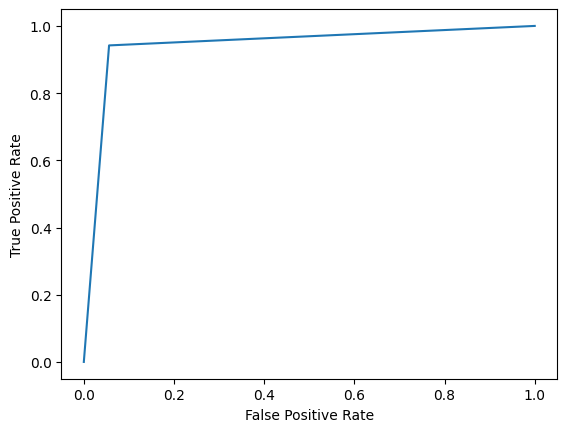

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score
print(classification_report(y_test,predictions ))
print(f'Accuracy ', accuracy_score(y_test, predictions ))
print(f'Precision ' , precision_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

el modelo arroja excelentes resultados en todas las mediciones usadas.